In [229]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [230]:
hidden_size = 3

In [231]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [232]:
prm_data_path = f'../data storage/prm_data_L16_FCNN_Nh{hidden_size}.pth'

In [233]:
prm = torch.load(prm_data_path, map_location=torch.device('cpu'))
prm

OrderedDict([('fc1.weight',
              tensor([[ 1.4982e-03, -2.1071e-02, -3.1451e-02,  3.6268e-02,  2.0841e-03,
                        8.9511e-02,  6.6400e-02,  1.4755e-01,  1.7745e-01,  1.9980e-01,
                        5.0590e-02, -1.1269e-02,  1.1807e-01,  2.2363e-02,  4.5480e-02,
                       -3.1087e-02, -1.5080e-02,  9.1491e-02, -2.0839e-03,  1.2617e-02,
                        6.2576e-03,  4.5063e-02, -1.8083e-02,  6.5594e-02,  2.0936e-01,
                        6.6299e-03, -1.3627e-01, -7.0458e-02,  2.4901e-02,  4.8341e-02,
                        4.2696e-02, -6.2931e-02,  1.3781e-01,  6.4756e-02,  9.2869e-02,
                        8.1123e-02,  1.0727e-02,  7.4308e-02, -9.9698e-02,  8.5314e-03,
                        1.6225e-02,  3.4817e-02,  2.9255e-02,  1.0698e-01,  1.3703e-03,
                       -5.9861e-02,  5.7917e-02, -1.8928e-02,  4.4125e-02,  1.4508e-02,
                       -4.0920e-02, -6.2378e-02,  8.1374e-02,  9.4364e-02, -3.3952e-02,
    

In [234]:
fc2_weight = prm['fc2.weight']
fc2_weight

tensor([[ -93.4821,  -97.1011,    4.4090],
        [ -84.7150,  -77.3449,    4.3389],
        [ -70.3908,  -65.3732,    4.2585],
        [ -23.3590,  -23.1087,   -7.3237],
        [ -16.0137,  -16.1365,   -8.4420],
        [ -13.6378,  -12.7933,   -8.7345],
        [ -26.6397,  -27.3247,    4.9623],
        [  -6.4325,   -6.5453,   -0.5751],
        [   1.6398,    1.5091,  -13.5589],
        [   3.5424,    4.0379,  -44.5332],
        [   3.1429,    4.0187,  -62.7313],
        [  -7.8396,   -1.2083,  -80.1701],
        [   5.7053,   -9.8140,  -95.6304],
        [   4.9055,   -8.6911,  -99.2533],
        [   5.7630,    4.6616, -114.2102],
        [   5.0070,    6.9097, -118.5697],
        [   5.5713,    6.3448, -124.2546],
        [   6.9379,  -16.0964, -117.5921],
        [   2.6875,    7.6058, -117.0344],
        [   6.0159,    6.7181, -127.4257]])

In [235]:
fc2_weight.size()

torch.Size([20, 3])

In [236]:
# NumPy配列に変換
fc2_weight_np = fc2_weight.cpu().numpy()
# データを転置して
fc2_weight_np_square = fc2_weight_np.T

In [237]:
fc2_weight_np_square

array([[ -93.48207  ,  -84.715    ,  -70.39079  ,  -23.358997 ,
         -16.013657 ,  -13.637765 ,  -26.639736 ,   -6.4325438,
           1.6397847,    3.5424082,    3.1428926,   -7.839552 ,
           5.7052903,    4.905464 ,    5.763033 ,    5.006993 ,
           5.5713196,    6.9378953,    2.6874938,    6.0158997],
       [ -97.10114  ,  -77.34493  ,  -65.37315  ,  -23.108692 ,
         -16.136469 ,  -12.793336 ,  -27.324656 ,   -6.545308 ,
           1.5091048,    4.037859 ,    4.0187426,   -1.2083288,
          -9.813958 ,   -8.6911   ,    4.6615896,    6.909656 ,
           6.3447623,  -16.096418 ,    7.605803 ,    6.7180724],
       [   4.409007 ,    4.3389378,    4.2584777,   -7.3237033,
          -8.442025 ,   -8.734478 ,    4.9622703,   -0.5750909,
         -13.558875 ,  -44.533154 ,  -62.731346 ,  -80.17011  ,
         -95.6304   ,  -99.25329  , -114.210236 , -118.5697   ,
        -124.25465  , -117.59209  , -117.03438  , -127.42571  ]],
      dtype=float32)

In [238]:
fc2_weight_np_square.shape

(3, 20)

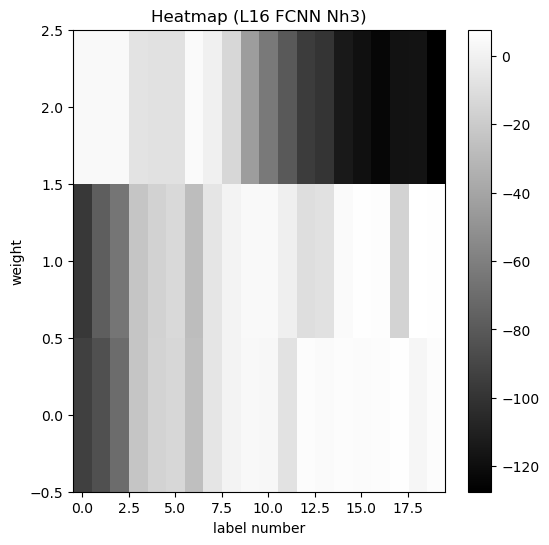

In [239]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh3)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig(f'../image/L16_FCNN_Nh{hidden_size}_wight.png')
plt.show()

In [240]:
fc2_weight_np_square_sum = np.sum(fc2_weight_np_square, axis=0)
fc2_weight_np_square_sum

array([-186.17421 , -157.721   , -131.50546 ,  -53.791393,  -40.592148,
        -35.16558 ,  -49.002125,  -13.552942,  -10.409986,  -36.95289 ,
        -55.56971 ,  -89.217995,  -99.73907 , -103.038925, -103.785614,
       -106.65305 , -112.33856 , -126.75061 , -106.74108 , -114.69174 ],
      dtype=float32)

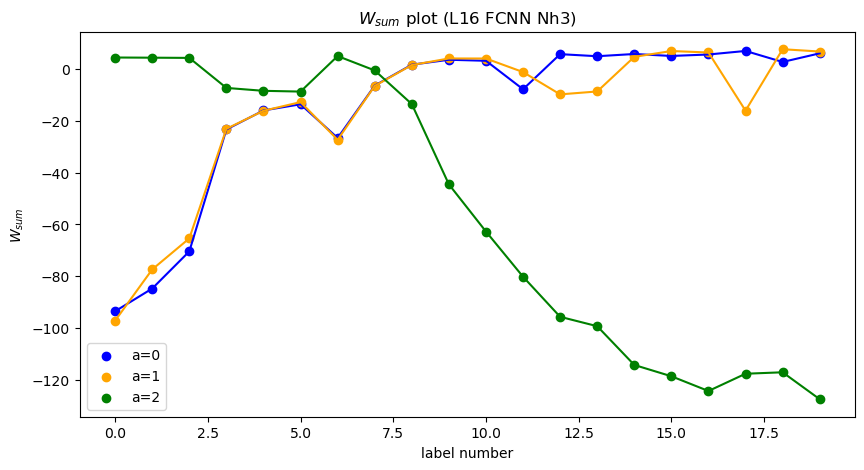

In [241]:
import numpy as np
import matplotlib.pyplot as plt

# データ
x = np.arange(len(fc2_weight_np_square[1]))
y0 = fc2_weight_np_square[0]
y1 = fc2_weight_np_square[1]
y2 = fc2_weight_np_square[2]

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')
plt.plot(x, y0, color='blue')
plt.plot(x, y1, color='orange')
plt.plot(x, y2, color='green')
plt.title('$W_{sum}$ plot (L16 FCNN Nh3)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# 図をファイルとして保存
plt.savefig(f'../image/L16_FCNN_Nh{hidden_size}_weight_plot.png')
plt.legend()  # 凡例を表示
plt.show()

第1層の出力と磁化の相関図を作成

In [242]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [243]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [244]:
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16_v2.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [245]:
# # 磁化を計算
# def magnetization(state):
#     return np.mean(state)

# for i in range(len(spin_data)):
#     mag = magnetization(spin_data[i])
#     if mag > 0:
#         spin_data[i] *= -1

In [246]:
spin_data[0].shape

(16, 16)

In [247]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]
flat_spin_data[0].shape

(256,)

In [248]:
fc1_weight = prm['fc1.weight'].cpu().numpy()
len(fc1_weight)


3

In [249]:
fc1_bias = prm['fc1.bias'].cpu().numpy()
fc1_bias

array([-2.522531 , -2.2614512,  2.747926 ], dtype=float32)

In [250]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [251]:
len(output_data_0)

40000

In [252]:
len(mag_data)

40000

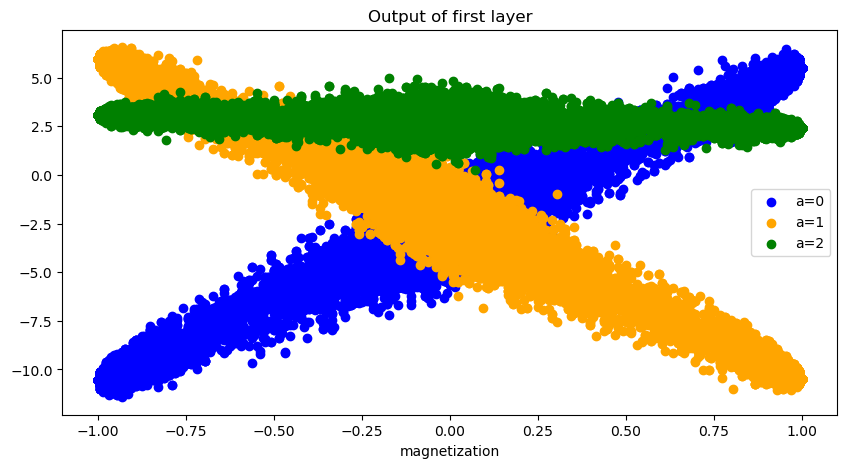

In [253]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()

学習済みモデルからプロットするver

In [254]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        return x

In [255]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [256]:
input_size = 16*16
hidden_size = 3
output_size = 20
model = FCNN2(input_size, hidden_size, output_size).to(device)

model.load_state_dict(torch.load(prm_data_path), strict=False)
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[ 1.4982e-03, -2.1071e-02, -3.1451e-02,  3.6268e-02,  2.0841e-03,
          8.9511e-02,  6.6400e-02,  1.4755e-01,  1.7745e-01,  1.9980e-01,
          5.0590e-02, -1.1269e-02,  1.1807e-01,  2.2363e-02,  4.5480e-02,
         -3.1087e-02, -1.5080e-02,  9.1491e-02, -2.0839e-03,  1.2617e-02,
          6.2576e-03,  4.5063e-02, -1.8083e-02,  6.5594e-02,  2.0936e-01,
          6.6299e-03, -1.3627e-01, -7.0458e-02,  2.4901e-02,  4.8341e-02,
          4.2696e-02, -6.2931e-02,  1.3781e-01,  6.4756e-02,  9.2869e-02,
          8.1123e-02,  1.0727e-02,  7.4308e-02, -9.9698e-02,  8.5314e-03,
          1.6225e-02,  3.4817e-02,  2.9255e-02,  1.0698e-01,  1.3703e-03,
         -5.9861e-02,  5.7917e-02, -1.8928e-02,  4.4125e-02,  1.4508e-02,
         -4.0920e-02, -6.2378e-02,  8.1374e-02,  9.4364e-02, -3.3952e-02,
          1.3715e-02,  3.1601e-02,  7.7414e-02,  9.4537e-02,  1.1100e-02,
          1.2020e-01,  1.4628e-02,  8.0713e-03,  6.9696e-02,  5.4067e-02,
          

In [257]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [258]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)
        
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [259]:
# NumPy ndarrayをPyTorch Tensorに変換
spin_data_tensor = [torch.from_numpy(i).type(torch.float32) for i in spin_data]
spin_data_tensor[0].size()

torch.Size([16, 16])

In [260]:
output = [np.squeeze(model(spin_data_tensor[i]).detach().numpy()) for i in range(len(spin_data_tensor))]

In [261]:
a = torch.squeeze(model(spin_data_tensor[1]))
b = [a[i].detach().numpy() for i in range(3)]
b[0]

array([-1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1.], dtype=float32)

In [262]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]

In [263]:
fc0_weight = model.state_dict()['fc1.weight'].cpu().numpy()
fc0_bias = model.state_dict()['fc1.bias'].cpu().numpy()

In [264]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [265]:
output_data_0

[-0.7060773767880164,
 -2.4727794464561157,
 -5.122857426002156,
 -3.6781181054539047,
 -1.9067667896742932,
 -2.33808246726403,
 -1.3348640590556897,
 -0.6876791712711565,
 -3.4597897268249653,
 -4.157868422975298,
 -2.615205574722495,
 -3.6321056041051634,
 -1.9340279305470176,
 -2.532104486541357,
 -2.5467289517982863,
 -1.5883111992734484,
 -2.5228839538176544,
 -0.045261993596795946,
 -4.35687460337067,
 -2.2034289418370463,
 -2.175193114031572,
 -3.1774599601631053,
 -2.0563631079276092,
 -5.206464861345012,
 -2.0881042824476026,
 -2.3334798117284663,
 -3.040907498274464,
 -0.9674172615050338,
 -3.8922183551476337,
 -1.5295099788927473,
 -3.4685543666710146,
 -4.092444988025818,
 -0.011377435585018247,
 -3.474573880957905,
 -3.1001971205114387,
 -4.932486093894113,
 -1.8065006575197913,
 -2.5580996943754144,
 -1.6691360687254928,
 -2.106817103747744,
 -3.0915382027742453,
 -3.453124974796083,
 -2.317369178577792,
 -5.186306801915634,
 -5.381976026401389,
 -2.3488362596253864,
 -2

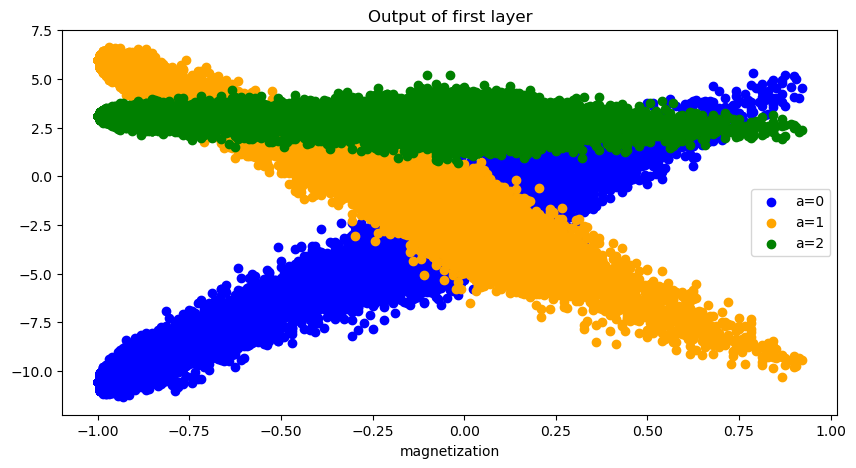

In [266]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
# plt.savefig('../image/L16_CNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()